# Desafio 6

Neste desafio, vamos praticar _feature engineering_, um dos processos mais importantes e trabalhosos de ML. Utilizaremos o _data set_ [Countries of the world](https://www.kaggle.com/fernandol/countries-of-the-world), que contém dados sobre os 227 países do mundo com informações sobre tamanho da população, área, imigração e setores de produção.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import KBinsDiscretizer, OneHotEncoder, StandardScaler
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [2]:
# Algumas configurações para o matplotlib.
# %matplotlib inline

# from IPython.core.pylabtools import figsize


# figsize(12, 8)

sns.set()

In [3]:
countries = pd.read_csv("countries.csv")

In [4]:
new_column_names = [
    "Country", "Region", "Population", "Area", "Pop_density", "Coastline_ratio",
    "Net_migration", "Infant_mortality", "GDP", "Literacy", "Phones_per_1000",
    "Arable", "Crops", "Other", "Climate", "Birthrate", "Deathrate", "Agriculture",
    "Industry", "Service"
]

countries.columns = new_column_names

countries.head(5)

,Country,Region,Population,Area,Pop_density,Coastline_ratio,Net_migration,Infant_mortality,GDP,Literacy,Phones_per_1000,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


## Observações

Esse _data set_ ainda precisa de alguns ajustes iniciais. Primeiro, note que as variáveis numéricas estão usando vírgula como separador decimal e estão codificadas como strings. Corrija isso antes de continuar: transforme essas variáveis em numéricas adequadamente.

Além disso, as variáveis `Country` e `Region` possuem espaços a mais no começo e no final da string. Você pode utilizar o método `str.strip()` para remover esses espaços.

## Inicia sua análise a partir daqui

In [5]:
# Sua análise começa aqui.
print(countries["Country"].unique())
print(countries["Region"].unique())

['Afghanistan ' 'Albania ' 'Algeria ' 'American Samoa ' 'Andorra '
 'Angola ' 'Anguilla ' 'Antigua & Barbuda ' 'Argentina ' 'Armenia '
 'Aruba ' 'Australia ' 'Austria ' 'Azerbaijan ' 'Bahamas, The ' 'Bahrain '
 'Bangladesh ' 'Barbados ' 'Belarus ' 'Belgium ' 'Belize ' 'Benin '
 'Bermuda ' 'Bhutan ' 'Bolivia ' 'Bosnia & Herzegovina ' 'Botswana '
 'Brazil ' 'British Virgin Is. ' 'Brunei ' 'Bulgaria ' 'Burkina Faso '
 'Burma ' 'Burundi ' 'Cambodia ' 'Cameroon ' 'Canada ' 'Cape Verde '
 'Cayman Islands ' 'Central African Rep. ' 'Chad ' 'Chile ' 'China '
 'Colombia ' 'Comoros ' 'Congo, Dem. Rep. ' 'Congo, Repub. of the '
 'Cook Islands ' 'Costa Rica ' "Cote d'Ivoire " 'Croatia ' 'Cuba '
 'Cyprus ' 'Czech Republic ' 'Denmark ' 'Djibouti ' 'Dominica '
 'Dominican Republic ' 'East Timor ' 'Ecuador ' 'Egypt ' 'El Salvador '
 'Equatorial Guinea ' 'Eritrea ' 'Estonia ' 'Ethiopia ' 'Faroe Islands '
 'Fiji ' 'Finland ' 'France ' 'French Guiana ' 'French Polynesia '
 'Gabon ' 'Gambia, The ' 'Gaza St

In [6]:
for col in ["Country", "Region"]:
    countries[col] = countries[col].str.strip()

In [7]:
countries.dtypes

Country              object
Region               object
Population            int64
Area                  int64
Pop_density          object
Coastline_ratio      object
Net_migration        object
Infant_mortality     object
GDP                 float64
Literacy             object
Phones_per_1000      object
Arable               object
Crops                object
Other                object
Climate              object
Birthrate            object
Deathrate            object
Agriculture          object
Industry             object
Service              object
dtype: object

In [8]:
columns_dec = ["Pop_density", "Coastline_ratio", "Net_migration", "Infant_mortality", "Literacy", 
               "Phones_per_1000", "Arable", "Crops", "Other", "Climate", "Birthrate", "Deathrate", 
               "Agriculture", "Industry", "Service"]

for col in columns_dec:
    countries[col] = countries[col].str.replace(",", ".").astype(float)

In [9]:
countries.head()

,Country,Region,Population,Area,Pop_density,Coastline_ratio,Net_migration,Infant_mortality,GDP,Literacy,Phones_per_1000,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


## Questão 1

Quais são as regiões (variável `Region`) presentes no _data set_? Retorne uma lista com as regiões únicas do _data set_ com os espaços à frente e atrás da string removidos (mas mantenha pontuação: ponto, hífen etc) e ordenadas em ordem alfabética.

In [10]:
def q1():
    # Retorne aqui o resultado da questão 1.
    return sorted(countries["Region"].unique())

## Questão 2

Discretizando a variável `Pop_density` em 10 intervalos com `KBinsDiscretizer`, seguindo o encode `ordinal` e estratégia `quantile`, quantos países se encontram acima do 90º percentil? Responda como um único escalar inteiro.

In [11]:
def q2():
    # Retorne aqui o resultado da questão 2.
    discretizer = KBinsDiscretizer(n_bins=10, encode="ordinal", strategy="quantile")
    discretizer.fit(countries[["Pop_density"]])
    countries["Pop_density_discr"] = discretizer.transform(countries[["Pop_density"]])
    return len(countries[countries["Pop_density_discr"] > 8]["Country"].unique())

# Questão 3

Se codificarmos as variáveis `Region` e `Climate` usando _one-hot encoding_, quantos novos atributos seriam criados? Responda como um único escalar.

In [12]:
def q3():
    # Retorne aqui o resultado da questão 3.
    countries2 = countries.copy()
    countries2.fillna(countries2.mean(), inplace=True)
    one_hot_encoder = OneHotEncoder(sparse=False, dtype=np.int)
    region_one_hot = one_hot_encoder.fit_transform(countries2[["Region"]])
    climate_one_hot = one_hot_encoder.fit_transform(countries2[["Climate"]])
    return region_one_hot.shape[1] + climate_one_hot.shape[1]

## Questão 4

Aplique o seguinte _pipeline_:

1. Preencha as variáveis do tipo `int64` e `float64` com suas respectivas medianas.
2. Padronize essas variáveis.

Após aplicado o _pipeline_ descrito acima aos dados (somente nas variáveis dos tipos especificados), aplique o mesmo _pipeline_ (ou `ColumnTransformer`) ao dado abaixo. Qual o valor da variável `Arable` após o _pipeline_? Responda como um único float arredondado para três casas decimais.

In [13]:
test_country = [
    'Test Country', 'NEAR EAST', -0.19032480757326514,
    -0.3232636124824411, -0.04421734470810142, -0.27528113360605316,
    0.13255850810281325, -0.8054845935643491, 1.0119784924248225,
    0.6189182532646624, 1.0074863283776458, 0.20239896852403538,
    -0.043678728558593366, -0.13929748680369286, 1.3163604645710438,
    -0.3699637766938669, -0.6149300604558857, -0.854369594993175,
    0.263445277972641, 0.5712416961268142
]

In [14]:
pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("standardization", StandardScaler())
])
selected_cols = countries.columns[(countries.dtypes == "int64") | (countries.dtypes == "float64")]
print(selected_cols)
pipe.fit(countries[selected_cols])

Index(['Population', 'Area', 'Pop_density', 'Coastline_ratio', 'Net_migration',
       'Infant_mortality', 'GDP', 'Literacy', 'Phones_per_1000', 'Arable',
       'Crops', 'Other', 'Climate', 'Birthrate', 'Deathrate', 'Agriculture',
       'Industry', 'Service'],
      dtype='object')


Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('standardization', StandardScaler())])

In [15]:
def q4():
    # Retorne aqui o resultado da questão 4.
    test = pipe.transform([test_country[2:]])
    return test[0][9].round(3)

## Questão 5

Descubra o número de _outliers_ da variável `Net_migration` segundo o método do _boxplot_, ou seja, usando a lógica:

$$x \notin [Q1 - 1.5 \times \text{IQR}, Q3 + 1.5 \times \text{IQR}] \Rightarrow x \text{ é outlier}$$

que se encontram no grupo inferior e no grupo superior.

Você deveria remover da análise as observações consideradas _outliers_ segundo esse método? Responda como uma tupla de três elementos `(outliers_abaixo, outliers_acima, removeria?)` ((int, int, bool)).

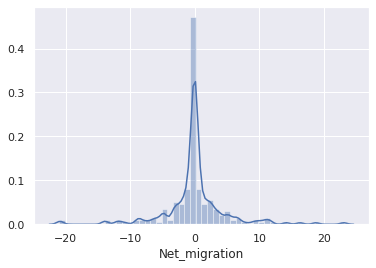

In [16]:
sns.distplot(countries["Net_migration"].dropna())

In [17]:
def q5():
    # Retorne aqui o resultado da questão 4.
    net_migration = countries["Net_migration"]
    q1, q3 = net_migration.quantile(0.25), net_migration.quantile(0.75)
    iqr =  q3 - q1
    lower_outliers = (net_migration < q1 - 1.5 * iqr).sum()
    upper_outliers = (net_migration > q3 + 1.5 * iqr).sum()
    return (lower_outliers, upper_outliers, False)

## Questão 6
Para as questões 6 e 7 utilize a biblioteca `fetch_20newsgroups` de datasets de test do `sklearn`

Considere carregar as seguintes categorias e o dataset `newsgroups`:

```
categories = ['sci.electronics', 'comp.graphics', 'rec.motorcycles']
newsgroup = fetch_20newsgroups(subset="train", categories=categories, shuffle=True, random_state=42)
```


Aplique `CountVectorizer` ao _data set_ `newsgroups` e descubra o número de vezes que a palavra _phone_ aparece no corpus. Responda como um único escalar.

In [18]:
categories = ['sci.electronics', 'comp.graphics', 'rec.motorcycles']
newsgroup = fetch_20newsgroups(subset="train", categories=categories, shuffle=True, random_state=42)

In [19]:
def q6():
    # Retorne aqui o resultado da questão 4.
    cv = CountVectorizer()
    newsgroup_counts = cv.fit_transform(newsgroup.data)
    idx = cv.vocabulary_.get("phone")
    return newsgroup_counts[:, idx].toarray().sum()

## Questão 7

Aplique `TfidfVectorizer` ao _data set_ `newsgroups` e descubra o TF-IDF da palavra _phone_. Responda como um único escalar arredondado para três casas decimais.

In [20]:
def q7():
    # Retorne aqui o resultado da questão 4.
    tfidf = TfidfVectorizer()
    tfidf = tfidf.fit(newsgroup.data)
    newsgroup_tfidf = tfidf.transform(newsgroup.data)
    idx_phone = tfidf.vocabulary_.get("phone")
    return newsgroup_tfidf[:, idx_phone].toarray().sum().round(3)